In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dietary.describe()

dietary = pd.read_csv('dietary.csv') 
diary_data_encoded = pd.get_dummies(dietary, columns=['food type'])
diary_data_encoded = diary_data_encoded.replace({True: 1, False: 0})

# dietary = dietary.dropna(how='any')


In [17]:
diary_data_encoded

,Total saturated fatty acids,Total monounsaturated fatty acids,Total polyunsaturated fatty acids,Energy,Protein,Carbohydrate,Sugars,Dietary Fiber,Total Fat,food type_baking,food type_fried,food type_heat or cook,food type_w/o heat or cook
0,0.531,0.447,1.168,184.0,8.92,31.26,3.20,4.4,2.58,1,0,0,0
1,9.589,3.924,0.568,134.0,0.16,0.01,0.01,0.0,15.14,1,0,0,0
2,0.000,0.000,0.000,40.0,0.00,10.06,10.06,0.0,0.00,0,0,0,1
3,2.220,0.106,0.027,24.0,0.24,0.58,0.35,0.2,2.50,0,0,0,1
4,0.000,0.000,0.000,3.0,0.18,0.51,0.05,0.1,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,5.382,0.447,0.097,107.0,0.45,13.97,12.70,0.9,6.36,0,0,0,1
3626,0.196,0.115,0.291,161.0,1.73,38.86,15.43,1.0,0.73,0,0,1,0
3627,1.919,0.691,0.100,86.0,5.79,8.49,8.45,0.0,3.28,0,0,1,0
3628,1.142,0.381,0.571,238.0,3.36,55.83,21.89,5.9,2.16,0,0,1,0


In [35]:
X = diary_data_encoded.drop(columns=diary_data_encoded.columns[0:3])

for i in range(3):
    print(dietary.columns[i])
    y = diary_data_encoded[diary_data_encoded.columns[i]]
    
    # Ordinary Linear Regression
    linear_regressor = LinearRegression()
    linear_r2_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='r2')
    print(f"Ordinary Linear Regression Average R^2 Score: {np.mean(linear_r2_scores)}")

    # KNN
    knn_regressor = KNeighborsRegressor()
    knn_r2_scores = cross_val_score(knn_regressor, X, y, cv=5, scoring='r2')
    print(f"KNN Average R^2 Score: {np.mean(knn_r2_scores)}")

    # SVM Regressor
    svr_model = SVR()
    svr_r2_scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')
    print(f"SVM Average R^2 Score: {np.mean(svr_r2_scores)}")

    # Decision Tree Regressor
    tree_regressor = DecisionTreeRegressor()
    tree_r2_scores = cross_val_score(tree_regressor, X, y, cv=5, scoring='r2')
    print(f"Decision Tree Regressor Average R^2 Score: {np.mean(tree_r2_scores)}")
    
    # Random Forest Regressor
    rf_regressor = RandomForestRegressor()
    rf_r2_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')
    print(f"Random Forest Average R^2 Score: {np.mean(rf_r2_scores)}")

    # Gradient Boosting Regressor
    gb_regressor = GradientBoostingRegressor()
    gb_r2_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='r2')
    print(f"Gradient Boosting Regressor Average R^2 Score: {np.mean(gb_r2_scores)}")


Total saturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.7470887566577591
KNN Average R^2 Score: 0.7234311251202763
SVM Average R^2 Score: 0.5717409510345816
Decision Tree Regressor Average R^2 Score: 0.6342237005170951
Random Forest Average R^2 Score: 0.8247333786330445
Gradient Boosting Regressor Average R^2 Score: 0.7843903490960754
Total monounsaturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.822756960991011
KNN Average R^2 Score: 0.7894712293255371
SVM Average R^2 Score: 0.7481844359207669
Decision Tree Regressor Average R^2 Score: 0.8460011920057611
Random Forest Average R^2 Score: 0.8992953988568722
Gradient Boosting Regressor Average R^2 Score: 0.8903775376337105
 Total polyunsaturated fatty acids
Ordinary Linear Regression Average R^2 Score: 0.6506121571147802
KNN Average R^2 Score: 0.5349705856783151
SVM Average R^2 Score: 0.38481512170269094
Decision Tree Regressor Average R^2 Score: 0.6450196968576234
Random Forest Average R^2 Score: 0

Random Forest has the smallest error for all three predictions

Total saturated fatty acids


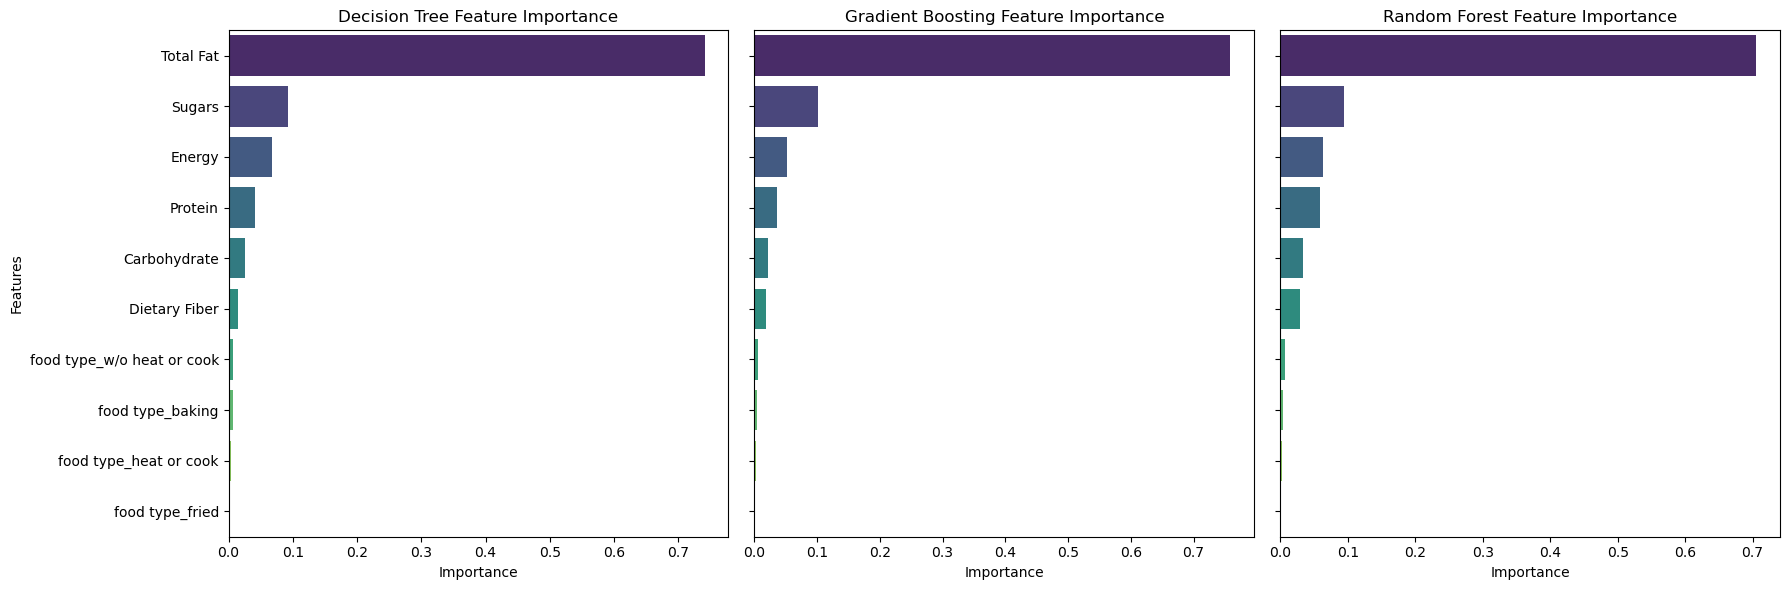

Total monounsaturated fatty acids


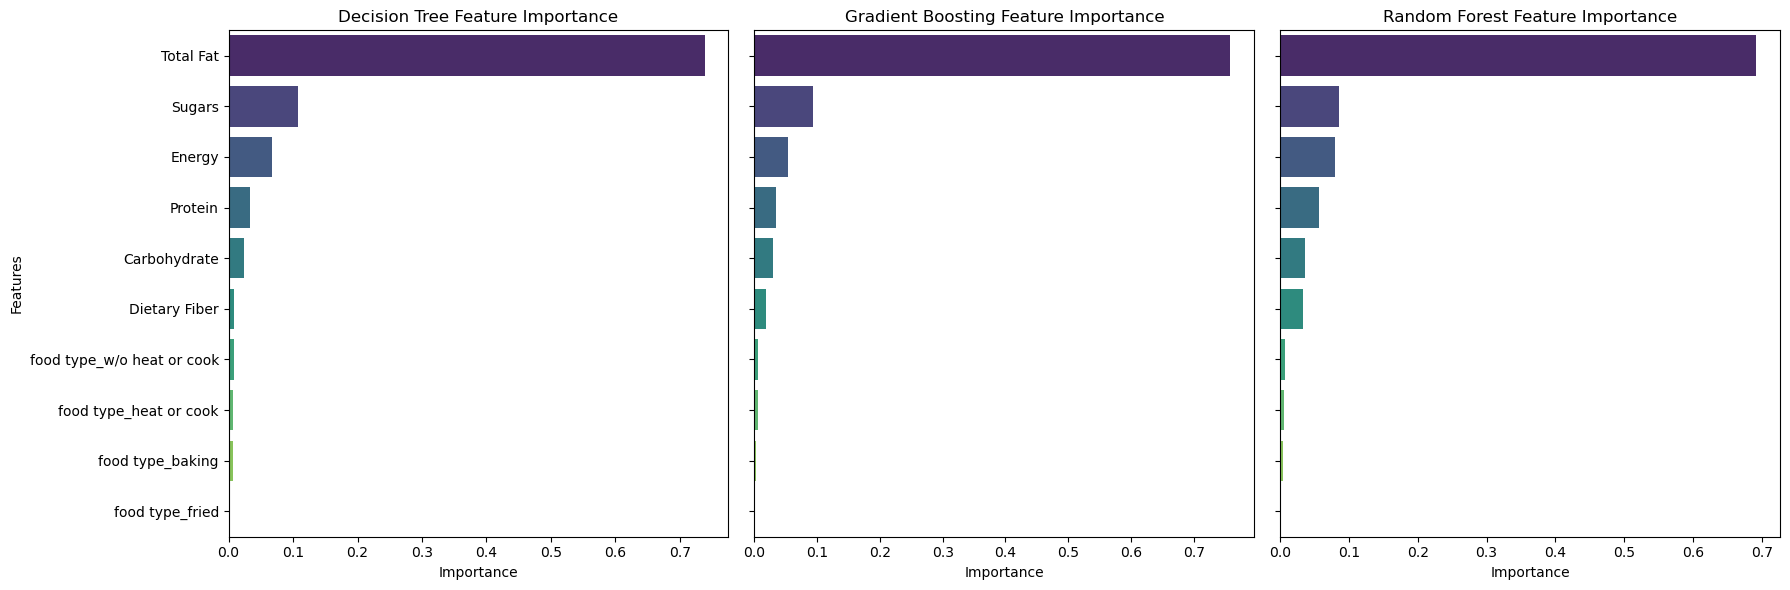

 Total polyunsaturated fatty acids


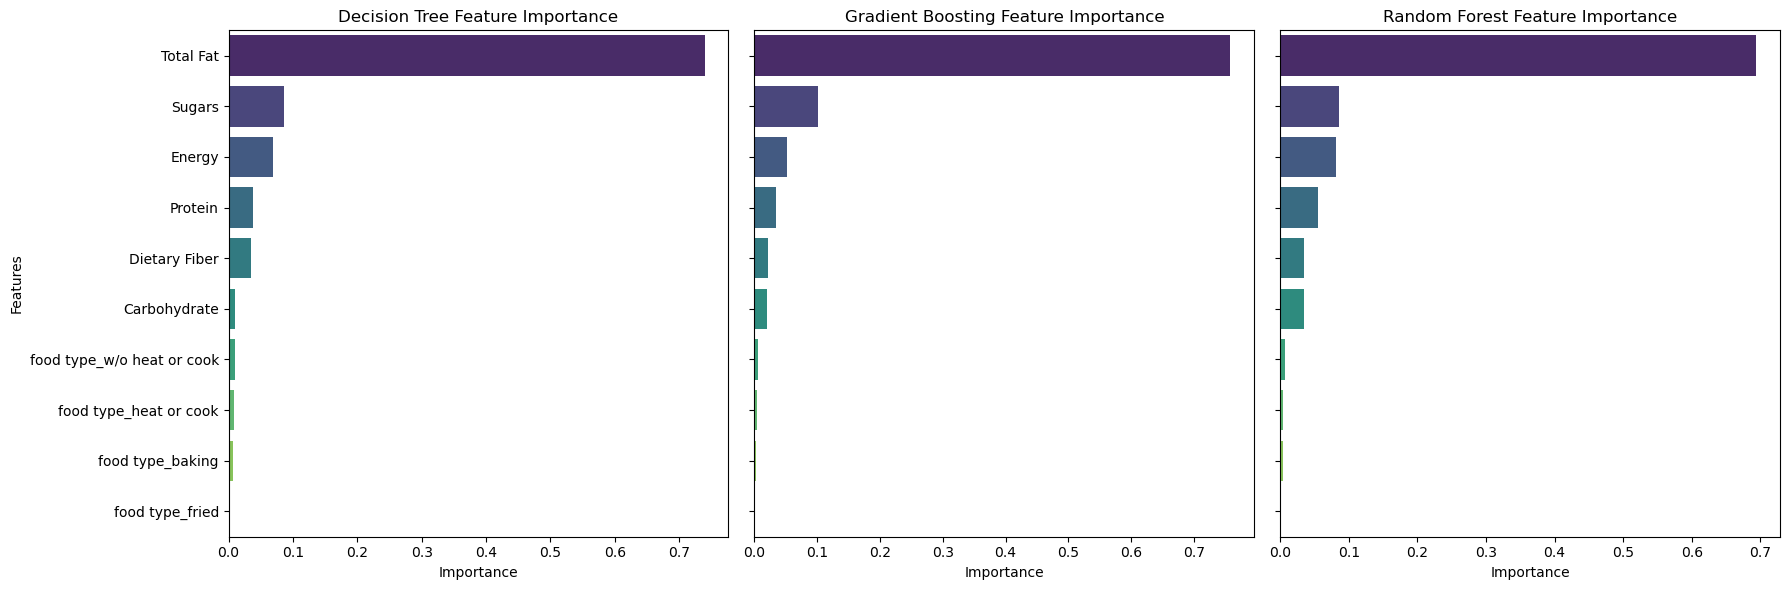

In [34]:
for i in range(3):
    print(dietary.columns[i])
    # Fit the models
    tree_regressor = DecisionTreeRegressor().fit(X, y)
    gb_regressor = GradientBoostingRegressor().fit(X, y)
    rf_regressor = RandomForestRegressor().fit(X, y)

    # Get feature importances
    tree_importance = tree_regressor.feature_importances_
    gb_importance = gb_regressor.feature_importances_
    rf_importance = rf_regressor.feature_importances_

    # Sort the feature importances in descending order
    tree_sorted_idx = np.argsort(tree_importance)[::-1]
    gb_sorted_idx = np.argsort(gb_importance)[::-1]
    rf_sorted_idx = np.argsort(rf_importance)[::-1]

    # Create subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

    # Decision Tree
    sns.barplot(x=tree_importance[tree_sorted_idx], y=X.columns[tree_sorted_idx], palette="viridis", ax=axs[0])
    axs[0].set_title('Decision Tree Feature Importance')
    axs[0].set_xlabel('Importance')
    axs[0].set_ylabel('Features')

    # Gradient Boosting
    sns.barplot(x=gb_importance[gb_sorted_idx], y=X.columns[gb_sorted_idx], palette="viridis", ax=axs[1])
    axs[1].set_title('Gradient Boosting Feature Importance')
    axs[1].set_xlabel('Importance')
    axs[1].set_ylabel('')

    # Random Forest
    sns.barplot(x=rf_importance[rf_sorted_idx], y=X.columns[rf_sorted_idx], palette="viridis", ax=axs[2])
    axs[2].set_title('Random Forest Feature Importance')
    axs[2].set_xlabel('Importance')
    axs[2].set_ylabel('')

    plt.tight_layout()
    plt.show()

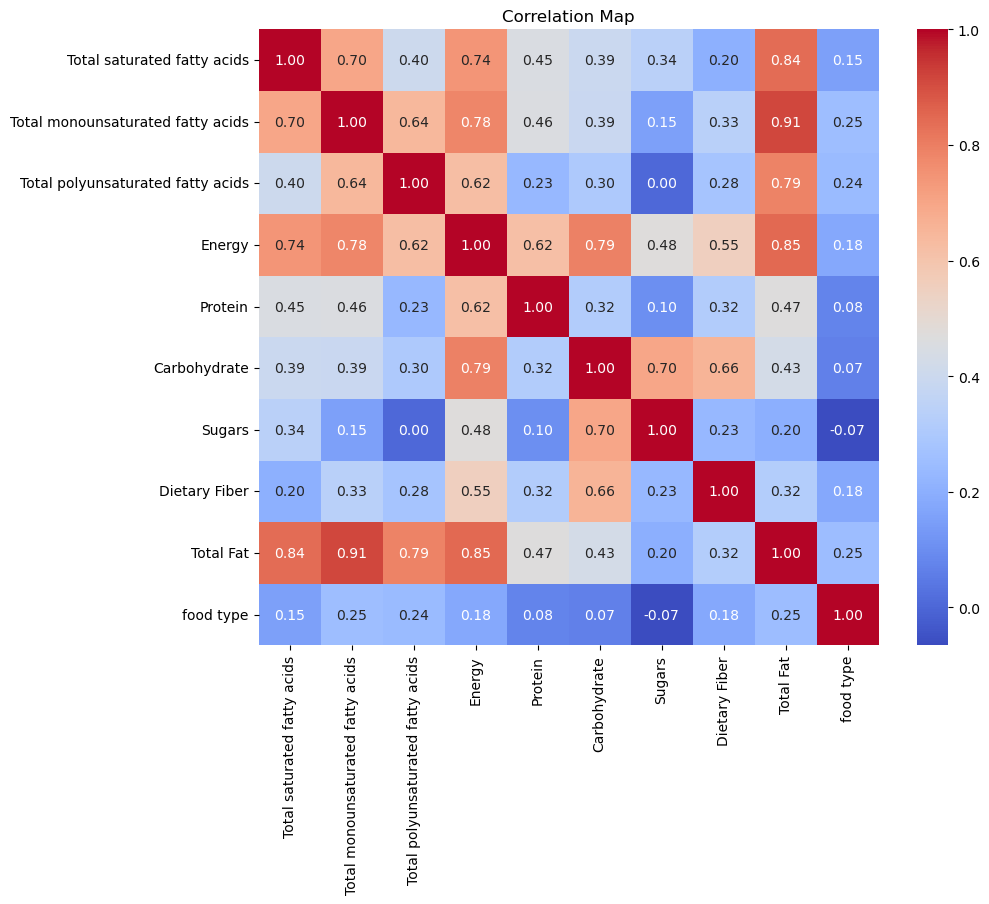

In [27]:
corr_matrix = dietary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map")
plt.show()


# scrach

In [3]:
X = dietary.drop(columns=dietary.columns[0:3])

y = dietary[dietary.columns[0]]

# total_sum = X['Total Fat'] + X['Carbohydrate'] + X['Protein']  
# pfat = X['Total Fat'] / total_sum 
# pcar = X['Carbohydrate'] / total_sum 
# ppro = X['Protein'] / total_sum  
# X['Total Fat %'] = pfat 
# X['Carbohydrate %'] = pcar 
# X['Protein %'] = ppro
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.71808541707989


# Tree (Random forest)

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.9334200971139268


# SVM

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

svr_model = SVR() 
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.179454919733392


In [ ]:
# give up tuning
# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Define a range of hyperparameters for tuning, including different kernels
param_grid = [
#    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
#     {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'epsilon': [0.01, 0.1, 0.5]},
#     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'epsilon': [0.01, 0.1, 0.5]}
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
]

# Initialize the SVR model
svr = SVR()

# Setup GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train_scaled)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (neg MSE):", grid_search.best_score_)

# Retrieve the best model
best_svr_model = grid_search.best_estimator_

# # Optionally, evaluate the best model on the test set
# y_pred_scaled = best_svr_model.predict(X_test_scaled)
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# # Calculate some evaluation metric, e.g., MSE
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test Set Mean Squared Error: {mse}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


# 